In [1]:
from datetime import datetime
from multiprocessing import dummy
from pyexpat import model
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm 
from  sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit
from scipy.stats import t as student_t

In [2]:

alldata = pd.read_csv('data.csv')
alldata['BidBusDt'] = pd.to_datetime(alldata['BidBusDt'])
interest_rates = pd.read_csv('interest_rates.csv')
interest_rates['BidBusDt'] = pd.to_datetime(interest_rates['BidBusDt'])
tenyear_spread = pd.read_csv('T10Y2Y.csv')
tenyear_spread.rename({'DATE':'BidBusDt', 'T10Y2Y':'Spread10Y2Y'}, axis=1, inplace=True)
tenyear_spread['BidBusDt'] = pd.to_datetime(tenyear_spread['BidBusDt'])
alldata = alldata.merge(interest_rates, on='BidBusDt')
alldata= alldata.merge(tenyear_spread, on='BidBusDt')
alldata = alldata.rename({'BidMonth':'MonthNum'}, axis=1)
alldata.rename({'PsSpread':'PS_Spread'}, axis=1, inplace=True)


# Look Predictor Features are day of the week, week of the month, and month of the year

In [3]:
from LookPredictor import PrepareLookPredictorData as plpd

cutoff_date = '2024-01-01'
prep_data = plpd(alldata, ['DayNum', 'WeekNum', 'MonthNum'], 
                 ['Spread10Y2Y'],[], cutoff_date)
prep_data.Xtrain

,DayNum_3,DayNum_4,DayNum_5,DayNum_6,WeekNum_2,WeekNum_3,WeekNum_4,WeekNum_5,WeekNum_6,WeekNum_7,...,MonthNum_5,MonthNum_6,MonthNum_7,MonthNum_8,MonthNum_9,MonthNum_10,MonthNum_11,MonthNum_12,const,Spread10Y2Y
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,1,-0.61
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,1,-0.67
2,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,1,-0.74
3,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,1,-0.69
4,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,1,-0.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,1,-0.41
246,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,1,-0.37
247,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,1,-0.41
248,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,1,-0.42


[ 4.41368773e-02  4.49979507e-02  4.55444726e-02  4.62403134e-02
  4.51220603e-01  5.00013104e-01  4.51303355e-01  7.62569066e-01
  1.33110365e+00  1.32943958e+00  1.36121249e+00  1.70927392e+00
  2.38863836e+00  2.28035552e+00  2.31344322e+00  2.27116476e+00
 -1.40791516e+14 -1.40791591e+14 -1.40791507e+14 -1.40791579e+14
 -1.09847069e+14 -1.09847254e+14 -1.09849286e+14 -1.09848478e+14
 -1.09849679e+14 -1.09849264e+14 -1.09848571e+14 -1.09848318e+14
 -1.09849288e+14 -8.87328296e+13 -8.87188460e+13 -8.87106008e+13
 -8.87245832e+13 -8.87288866e+13 -8.87141867e+13 -8.87123938e+13
 -8.87493224e+13 -8.87331888e+13 -8.87073741e+13 -8.87263762e+13
 -8.87041474e+13 -8.87163356e+13 -3.28185576e+14 -3.28185576e+14
 -3.28185576e+14 -3.28185576e+14 -3.28185576e+14 -3.28185576e+14
 -3.28185576e+14 -3.28185576e+14 -3.28185576e+14 -3.28185576e+14
 -3.28185576e+14 -3.28185576e+14 -3.28185576e+14  8.53179563e-01
  1.74207404e+00 -1.40791556e+14 -1.09849172e+14 -1.09846286e+14
 -8.87224320e+13 -8.87274

c:\Users\dflanner\qed\Aspen\MarginOptimization\dev\LookPredictor\LookPredictor.py:73: RuntimeWarning: invalid value encountered in sqrt
  tstats = self.stage1.coef_/(np.sqrt((self.sigma2hat*XXinv).diagonal()))
c:\Users\dflanner\qed\Aspen\MarginOptimization\dev\LookPredictor\LookPredictor.py:73: RuntimeWarning: invalid value encountered in sqrt
  tstats = self.stage1.coef_/(np.sqrt((self.sigma2hat*XXinv).diagonal()))
c:\Users\dflanner\qed\Aspen\MarginOptimization\dev\LookPredictor\LookPredictor.py:73: RuntimeWarning: invalid value encountered in sqrt
  tstats = self.stage1.coef_/(np.sqrt((self.sigma2hat*XXinv).diagonal()))
c:\Users\dflanner\qed\Aspen\MarginOptimization\dev\LookPredictor\LookPredictor.py:73: RuntimeWarning: invalid value encountered in sqrt
  tstats = self.stage1.coef_/(np.sqrt((self.sigma2hat*XXinv).diagonal()))
c:\Users\dflanner\qed\Aspen\MarginOptimization\dev\LookPredictor\LookPredictor.py:73: RuntimeWarning: invalid value encountered in sqrt
  tstats = self.stage1.c

[ 4.17436375e-02  4.24470044e-02  4.29795653e-02  4.34401314e-02
  2.27190556e-01  2.53914583e-01  2.31421026e-01  6.49068674e-01
  1.21192327e+00  1.21098570e+00  1.24719758e+00  1.56358120e+00
  2.16720246e+00  2.07622962e+00  2.07867351e+00  2.07574784e+00
 -1.24974261e+14 -1.24974331e+14 -1.24974166e+14 -1.24974189e+14
 -3.46347694e+13 -3.46347694e+13 -3.46222390e+13 -3.46277776e+13
 -3.46446677e+13 -3.46490274e+13 -3.46221203e+13 -3.46475742e+13
 -3.46276589e+13 -1.53571884e+14 -1.53407741e+14 -1.53407741e+14
 -1.53407741e+14 -1.53482853e+14 -1.53649729e+14 -1.53649729e+14
 -1.53662565e+14 -1.53649729e+14 -1.53585546e+14 -1.53598383e+14
 -1.53547036e+14 -1.53636892e+14  1.49197005e+14  1.49197005e+14
  1.49197005e+14  1.49197005e+14  1.49197005e+14  1.49197005e+14
  1.49197005e+14  1.49197005e+14  1.49197005e+14  1.49197005e+14
  1.49197005e+14  1.49197005e+14  1.49197005e+14  8.51222425e-01
  1.73713757e+00 -1.24974194e+14 -3.46114361e+13 -3.46400707e+13
 -1.53515898e+14 -1.53642

c:\Users\dflanner\qed\Aspen\MarginOptimization\dev\LookPredictor\LookPredictor.py:73: RuntimeWarning: invalid value encountered in sqrt
  tstats = self.stage1.coef_/(np.sqrt((self.sigma2hat*XXinv).diagonal()))
c:\Users\dflanner\qed\Aspen\MarginOptimization\dev\LookPredictor\LookPredictor.py:73: RuntimeWarning: invalid value encountered in sqrt
  tstats = self.stage1.coef_/(np.sqrt((self.sigma2hat*XXinv).diagonal()))
c:\Users\dflanner\qed\Aspen\MarginOptimization\dev\LookPredictor\LookPredictor.py:73: RuntimeWarning: invalid value encountered in sqrt
  tstats = self.stage1.coef_/(np.sqrt((self.sigma2hat*XXinv).diagonal()))
c:\Users\dflanner\qed\Aspen\MarginOptimization\dev\LookPredictor\LookPredictor.py:73: RuntimeWarning: invalid value encountered in sqrt
  tstats = self.stage1.coef_/(np.sqrt((self.sigma2hat*XXinv).diagonal()))
C:\Users\dflanner\AppData\Local\Temp\ipykernel_10848\2881012312.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

Method
Actuals                     0.000000
Current Look Predictor    725.809524
Coefficient Updating      842.400530
Simple                    865.773931
Name: MAE, dtype: float64

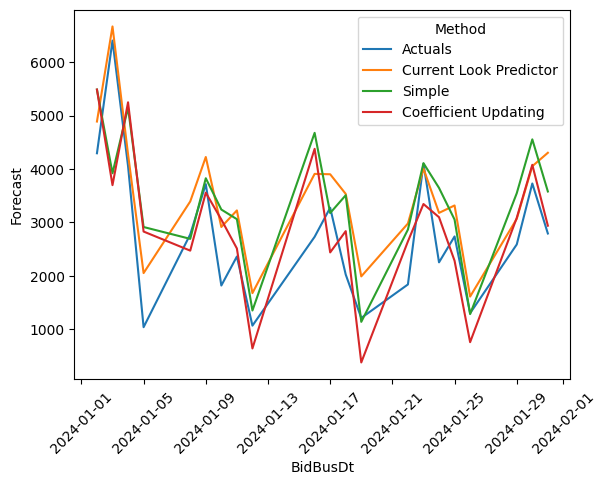

In [4]:
from LookPredictor import ForecastModel1 

fm1 = ForecastModel1()
f1 = fm1.forecast_simple(prep_data.Xtrain, prep_data.ytrain, prep_data.Xfuture, prep_data.yfuture, 3)
# f2 = fm1.forecast_update_parameters(prep_data.Xtrain, prep_data.ytrain, prep_data.Xfuture, prep_data.yfuture, 3)
# f1 = pd.concat([prep_data.future_time, f1], axis=1)
# f2 = pd.concat([prep_data.future_time, f2], axis=1)
# prep_data.yfuture.reset_index(drop=True, inplace=True)
# Actuals = pd.concat([prep_data.future_time,prep_data.yfuture], axis=1)
# Actuals['MAE'] = 0
# Actuals['Method'] = 'Actuals'
# Actuals.rename({'LookCnt':'Forecast'}, axis=1, inplace=True)
# baseline = pd.read_csv('forecasted_values.csv')
# baseline.loc[:,'BidBusDt'] = pd.to_datetime(baseline['BidBusDt'])
# bl = baseline[baseline['BidBusDt']>=datetime.strptime(cutoff_date,'%Y-%m-%d')]
# bl.rename(columns={'BidBusDt':'BidBusDt', 'LookCnt':'Forecast'}, inplace=True)
# bl['MAE'] = np.abs((bl['Forecast'].to_numpy() - prep_data.yfuture.to_numpy()))
# bl['Method'] = 'Current Look Predictor'

# ForecastData = pd.concat([Actuals, bl, f1,f2], axis=0)
# sns.lineplot(data=ForecastData, x='BidBusDt', y='Forecast', hue='Method')
# plt.xticks(rotation=45)

# ForecastData.groupby('Method')['MAE'].mean().sort_values()